# Gradient Descent
Gradient descent là một thuật toán tối ưu hóa thường được sử dụng để đào tạo các mô hình học máy và mạng nơ-ron. Nó đào tạo các mô hình học máy bằng cách giảm thiểu lỗi giữa kết quả dự đoán và kết quả thực tế.
Thuật toán hoạt động bằng cách điều chỉnh liên tục các tham số của mô hình (như trọng số và độ lệch) theo hướng làm giảm chi phí nhiều nhất. Hướng này được xác định bằng cách tính toán độ dốc (hướng đến mức tăng chi phí nhiều nhất) của hàm chi phí liên quan đến các tham số, sau đó di chuyển các tham số theo hướng ngược lại.


## One-Dimensional Gradient Descent
Xét một hàm thực khả vi liên tục $f: \mathbb{R} \rightarrow \mathbb{R}$ . Sử dụng khai triển Taylor:
$$f(x+\epsilon)=f(x)+\epsilon f^{\prime}(x)+O\left(\epsilon^2\right). \tag{1}$$ 
Tức là, trong xấp xỉ bậc một, $f(x+\epsilon)$ được xác định bởi giá trị hàm $f(x)$ và đạo hàm bậc một $f^{\prime}(x)$ tại $x$. Có thể giả định rằng với $\epsilon$ nhỏ, việc di chuyển theo hướng gradient âm sẽ giảm $f$. Chọn một kích thước bước cố định $\eta>0$ và chọn $\epsilon=-\eta f^{\prime}(x)$. Thay vào khai triển Taylor ở trên:
$$f\left(x-\eta f^{\prime}(x)\right)=f(x)-\eta f^{\prime 2}(x)+O\left(\eta^2 f^{\prime 2}(x)\right).\tag{2}$$
Nếu đạo hàm $f^{\prime}(x) \neq 0$ không tiêu biến, ta đạt được bước tiến tới điểm tối ưu vì $\eta f^{\prime 2}(x)>0$. Hơn nữa, ta luôn có thể chọn $\eta$ đủ nhỏ để các hạng bậc cao trở nên không đáng kể. Do đó:
$$f\left(x-\eta f^{\prime}(x)\right) \leq f(x). \tag{3}$$
Điều này có nghĩa là, nếu ta sử dụng:
$$x \leftarrow x-\eta f^{\prime}(x). \tag{4}$$
để lặp $x$, giá trị của hàm $f(x)$ có thể giảm. Do đó, trong gradient descent, ta đầu tiên chọn một giá trị ban đầu $x$ và một hằng số $\eta>0$, sau đó sử dụng chúng để lặp $x$ liên tục cho đến khi đạt điều kiện dừng, ví dụ, khi độ lớn của gradient $\left|f^{\prime}(x)\right|$ đủ nhỏ hoặc số lần lặp đạt một giá trị nhất định.
### Ví dụ minh họa
Ta chọn hàm mục tiêu $f(x)=x^2 +5sin(x)$ để minh họa cách thực hiện gradient descent. Đạo hàm: $f^{\prime}(x) =2x + 5cos(x)$

In [83]:
%matplotlib inline
import numpy as np
import torch
import d2l
def f(x):  # objective function
    return x**2 + 5 * np.sin(x)

def f_grad(x):  # Gradient (derivative) of the objective function
    return 2*x + 5 * np.cos(x)

Tiếp theo, ta sử dụng $x=-5$ làm giá trị ban đầu và giả sử $\eta=0.1$. Sử dụng gradient descent để lặp $x$ 15 lần, ta có thể thấy rằng x xuất phát từ bên trái và cuối cùng, giá trị của $x$ tiến gần đến nghiệm tối ưu.

In [84]:
def gd(eta, f_grad, start_x, step):
    x = start_x
    results = [x]
    for i in range(step):
        x -= eta * f_grad(x)
        results.append(x)
    print(f'epoch 11, x: {x:.6f}')
    return results

results = gd(0.1, f_grad,-5,15)

epoch 11, x: -1.110513


Tiến trình tối ưu hóa $x$ có thể được vẽ như sau.

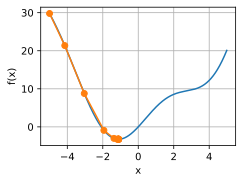

In [85]:
def show_trace(results, f):
    n = max(abs(min(results)), abs(max(results)))
    f_line = np.arange(-n, n, 0.01)
    d2l.set_figsize()
    d2l.plot([f_line, results], [[f(x) for x in f_line], [f(x) for x in results]], 'x', 'f(x)', fmts=['-', '-o'])
show_trace(results, f)

Ta sử dụng $x=4$ làm giá trị ban đầu và giả sử $\eta=0.1$. Sử dụng gradient descent để lặp $x$ 30 lần, ta có thể thấy rằng x xuất phát từ bên phải và đi dần tới nghiệm tối ưu

epoch 11, x: -1.105655


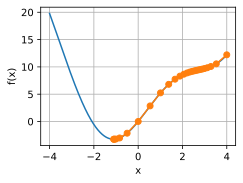

In [86]:
results = gd(0.1, f_grad,4,25)
show_trace(results, f)

### Learning Rate
Tốc độ học (learning rate) 𝜂 có thể được thiết lập bởi người thiết kế thuật toán. Nếu chúng ta sử dụng một tốc độ học quá nhỏ, nó sẽ khiến `𝑥` cập nhật rất chậm, đòi hỏi nhiều vòng lặp hơn để thu được nghiệm tốt hơn. Để minh họa điều xảy ra trong trường hợp như vậy, hãy xem xét tiến trình trong cùng bài toán tối ưu với 𝜂 = 0.02. Như ta có thể thấy, ngay cả sau 10 bước lặp, chúng ta vẫn còn cách xa nghiệm tối ưu.

epoch 11, x: -2.891120


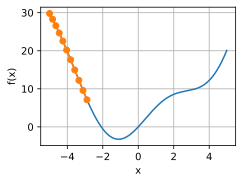

In [87]:
show_trace(gd(0.02, f_grad,-5,10), f)

Ngược lại, nếu chúng ta sử dụng tốc độ học quá lớn, giá trị `|𝜂 𝑓'(𝑥)|` có thể trở nên quá lớn đối với công thức khai triển Taylor bậc nhất. Nghĩa là, số hạng `O (𝜂² 𝑓'²(𝑥))` trong công thức (2) có thể trở nên đáng kể. Trong trường hợp này, chúng ta không thể đảm bảo rằng quá trình cập nhật lặp của `𝑥` sẽ làm giảm giá trị của hàm `𝑓(𝑥)`. Ví dụ, khi chúng ta đặt tốc độ học `𝜂 = 1.1`, `𝑥` vượt quá (overshoots) nghiệm tối ưu `𝑥 = 0` và dần dần phân kỳ.

epoch 11, x: 9.465996


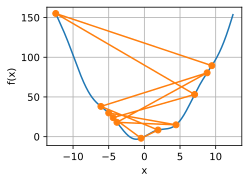

In [88]:
show_trace(gd(1.1, f_grad,-5,10), f)

### Local Minima
Để minh họa điều gì xảy ra với các hàm không lồi, hãy xem xét trường hợp $f(x) = 0.25x^4 - \frac{1}{3}x^3 - 1.5x^2 + 2x$ . Hàm này có  cực tiểu cục bộ tại $x = 2$, với $f(2) \approx -0.67$ và cực tiểu toàn cục nằm tại $x \approx -1.618$, với $f(-1.618) \approx -4.04$. Tùy thuộc vào lựa chọn tốc độ học và mức độ điều kiện của bài toán, ta có thể đạt được một trong nhiều nghiệm. Ví dụ dưới đây minh họa cách một tốc độ học cao sẽ dẫn đến một cực tiểu cục bộ kém. Với tốc độ học 0.08 giá trị của x bắt đầu tại -4 và đi về phía bên phải và vượt qua cực tiểu toàn cục rồi đi tới cực tiểu cục bộ tại $x=2$. 

epoch 11, x: 1.999771


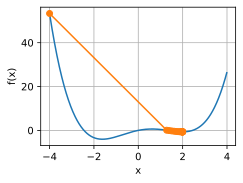

In [89]:
def f(x):  # Objective function
    return 0.25*x**4 - (1/3)*x**3 - 1.5*x**2 + 2*x

def f_grad(x):  # Gradient of the objective function
    return x**3 -x**2-3*x+2

show_trace(gd(0.08, f_grad,-4,20), f)

## Multivariate Gradient Descent
Xem xét tình huống mà $\mathbf{x}=\left[x_1, x_2, \ldots, x_d\right]^{\top}$. Tức là, hàm mục tiêu $f: \mathbb{R}^d \rightarrow \mathbb{R}$ ánh xạ các vector thành số thực. Gradient của nó cũng là đa biến, là một vector gồm $d$ đạo hàm riêng:
$$\nabla f(\mathbf{x})=\left[\frac{\partial f(\mathbf{x})}{\partial x_1}, \frac{\partial f(\mathbf{x})}{\partial x_2}, \ldots, \frac{\partial f(\mathbf{x})}{\partial x_d}\right]^{\top}. \tag{5}$$
Mỗi phần tử đạo hàm riêng $\partial f(\mathbf{x}) / \partial x_i$ trong gradient biểu thị tốc độ thay đổi của $f$ tại $\mathbf{x}$ theo đầu vào $x_i$. Như trong trường hợp một biến, ta có thể sử dụng xấp xỉ Taylor đa biến để có ý tưởng về việc nên làm gì. Cụ thể, ta có:
$$f(\mathbf{x}+\boldsymbol{\epsilon})=f(\mathbf{x})+\boldsymbol{\epsilon}^{\top} \nabla f(\mathbf{x})+O\left(|\boldsymbol{\epsilon}|^2\right). \tag{6}$$
Nói cách khác, đến các hạng bậc hai trong $\epsilon$, hướng giảm nhanh nhất được cho bởi gradient âm $-\nabla f(\mathbf{x})$. Chọn một tốc độ học phù hợp $\eta>0$ cho ra thuật toán gradient descent nguyên mẫu:
$$\mathbf{x} \leftarrow \mathbf{x}-\eta \nabla f(\mathbf{x}). \tag{7}$$
Lấy ví dụ hàm mục tiêu $f(\mathbf{x})=x_1^2+10x_2^2$ với vector hai chiều $\mathbf{x}=\left[x_1, x_2\right]^{\top}$ làm đầu vào và một số thực làm đầu ra. Gradient được cho bởi $\nabla f(\mathbf{x})=\left[2x_1, 20x_2\right]^{\top}$. Ta sẽ quan sát quỹ đạo của $\mathbf{x}$ bằng gradient descent từ vị trí ban đầu $[-5, -2]$.
Cần hai hàm hỗ trợ, hàm đầu tiên sử dụng một hàm cập nhật và áp dụng nó 20 lần cho giá trị ban đầu. Hàm hỗ trợ thứ hai trực quan hóa quỹ đạo của $\mathbf{x}$.

In [90]:
def train_2d(trainer, steps=20, f_grad=None):  # save
    """Optimize a 2D objective function with a customized trainer."""
    # s1 and s2 are internal state variables that will be used in Momentum,
    # Adagrad, RMSProp
    x1, x2, s1, s2 = -5, -2, 0, 0
    results = [(x1, x2)]
    for i in range(steps):
        if f_grad:
            x1, x2, s1, s2 = trainer(x1, x2, s1, s2, f_grad)
        else:
            x1, x2, s1, s2 = trainer(x1, x2, s1, s2)
        results.append((x1, x2))
    print(f'epoch {i + 1}, x1: {float(x1):f}, x2: {float(x2):f}')
    return results

def show_trace_2d(f, results):  # save
    """Show the trace of 2D variables during optimization."""
    d2l.set_figsize()
    d2l.plt.plot(*zip(*results), '-o', color='#ff7f0e')
    x1, x2 = torch.meshgrid(torch.arange(-10, 1.0, 0.1),
                            torch.arange(-3.0, 1.0, 0.1), indexing='ij')
    d2l.plt.contour(x1, x2, f(x1, x2), colors='#1f77b4')
    d2l.plt.xlabel('x1')
    d2l.plt.ylabel('x2')

Tiếp theo, ta quan sát quỹ đạo của biến tối ưu $\mathbf{x}$ với tốc độ học $\eta=0.1$. Ta thấy rằng sau 20 bước, giá trị của $\mathbf{x}$ tiến gần đến cực tiểu tại $[0, 0]$. Tiến trình khá ổn định mặc dù khá chậm.

epoch 20, x1: -2.210012, x2: -0.000073


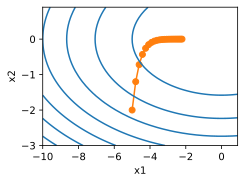

In [91]:
def f_2d(x1, x2): # Objective function
    return x1 ** 2 + 10 * x2 ** 2
def f_2d_grad(x1, x2): # Gradient of the objective function
    return (2 * x1, 20 * x2)
def gd_2d(x1, x2, s1, s2, f_grad):
    g1, g2 = f_grad(x1, x2)
    return (x1 - eta * g1, x2 - eta * g2, 0, 0)
eta = 0.02
show_trace_2d(f_2d, train_2d(gd_2d, f_grad=f_2d_grad))

## Adaptive Methods
Việc chọn tốc độ học $\eta$ "vừa đúng" là một việc khó khăn. Nếu chọn quá nhỏ, tiến bộ rất ít. Nếu chọn quá lớn, nghiệm sẽ dao động và trong trường hợp xấu nhất, có thể phân kỳ. Các phương pháp bậc hai, không chỉ xem xét giá trị và gradient của hàm mục tiêu mà còn xem xét độ cong của nó, có giúp ích trong trường hợp này. Mặc dù các phương pháp này không thể áp dụng trực tiếp cho deep learning do chi phí tính toán, chúng cung cấp trực giác hữu ích để thiết kế các thuật toán tối ưu hóa nâng cao, mô phỏng nhiều đặc tính mong muốn của các thuật toán được trình bày dưới đây.
### Phương Pháp Newton
Xem lại khai triển Taylor của hàm $f: \mathbb{R}^d \rightarrow \mathbb{R}$, không cần dừng lại sau hạng đầu tiên:
$$f(\mathbf{x}+\boldsymbol{\epsilon})=f(\mathbf{x})+\boldsymbol{\epsilon}^{\top} \nabla f(\mathbf{x})+\frac{1}{2} \boldsymbol{\epsilon}^{\top} \nabla^2 f(\mathbf{x}) \boldsymbol{\epsilon}+O\left(|\boldsymbol{\epsilon}|^3\right).\tag{8}$$
Để tránh ký hiệu phức tạp, ta định nghĩa $\mathbf{H} \stackrel{\text{def}}{=} \nabla^2 f(\mathbf{x})$ là ma trận Hessian của $f$, một ma trận $d \times d$.
Sau cùng, cực tiểu của $f$ thỏa mãn $\nabla f=0$. Bằng cách lấy đạo hàm của (8) theo $\epsilon$ và bỏ qua các hạng bậc cao:

1. **Số hạng đầu tiên: $ f(x) $**  
   Hàm $ f(x) $ là hằng số đối với $\epsilon$ bởi vì $ x $ là cố định. Cho nên:

   $$
   \nabla_{\epsilon} f(x) = 0
   $$

2. **Số hạng thứ 2: $ \epsilon^T \nabla f(x) $**

    $$ \boldsymbol{\epsilon}^\top \nabla f(\mathbf{x})
    = \epsilon_1 \frac{\partial f(\mathbf{x})}{\partial x_1}
    + \epsilon_2 \frac{\partial f(\mathbf{x})}{\partial x_2}
    + \cdots
    + \epsilon_d \frac{\partial f(\mathbf{x})}{\partial x_d}
    = \sum_{i=1}^{d} \epsilon_i \frac{\partial f(\mathbf{x})}{\partial x_i} $$
    
    Với
    
    $$
    \nabla f(\mathbf{x}) =
    \left[
    \frac{\partial f(\mathbf{x})}{\partial x_1}, \dots, \frac{\partial f(\mathbf{x})}{\partial x_d}
    \right]^\top
    $$
    
    là gradient của  $f$ tại $\mathbf{x}$. Suy ra

   $$
   \epsilon^T \nabla f(x) = \sum_{i=1}^d \epsilon_i \frac{\partial f(x)}{\partial x_i}
   $$
    
   Tính toán đạo hàm riêng với $\epsilon_j$:

   $$
   \frac{\partial}{\partial \epsilon_j} \left( \sum_{i=1}^d \epsilon_i \frac{\partial f(x)}{\partial x_i} \right) = \frac{\partial f(x)}{\partial x_j}
   $$

   Gradient là:

   $$
   \nabla_{\epsilon} (\epsilon^T \nabla f(x)) = \nabla f(x) = \begin{bmatrix} \frac{\partial f(x)}{\partial x_1} \\ \vdots \\ \frac{\partial f(x)}{\partial x_d} \end{bmatrix}
   $$

4. **Số hạng thứ 3: $ \frac{1}{2} \epsilon^T \nabla^2 f(x) \epsilon $**  
   $$
   \frac{1}{2} \epsilon^T \nabla^2 f(x) \epsilon = \frac{1}{2} \sum_{i=1}^d \sum_{j=1}^d \epsilon_i \epsilon_j \frac{\partial^2 f(x)}{\partial x_i \partial x_j}
   $$

   Đạo hàm riêng đối với $\epsilon_k$:

   $$
   \frac{\partial}{\partial \epsilon_k} \left( \frac{1}{2} \sum_{i=1}^d \sum_{j=1}^d \epsilon_i \epsilon_j \frac{\partial^2 f(x)}{\partial x_i \partial x_j} \right) = \frac{1}{2} \left( \sum_{j=1}^d \epsilon_j \frac{\partial^2 f(x)}{\partial x_k \partial x_j} + \sum_{i=1}^d \epsilon_i \frac{\partial^2 f(x)}{\partial x_i \partial x_k} \right)
   $$

   Bởi vì $\nabla^2 f(x)$ đối xứng nên hai tổng bằng nhau nên:

   $$
   \frac{\partial}{\partial \epsilon_k} = \sum_{j=1}^d \epsilon_j \frac{\partial^2 f(x)}{\partial x_k \partial x_j} = \left[ \nabla^2 f(x) \epsilon \right]_k
   $$

   Gradient là:

   $$
   \nabla_{\epsilon} \left( \frac{1}{2} \epsilon^T \nabla^2 f(x) \epsilon \right) = \nabla^2 f(x) \epsilon
   $$

5. **Kết hợp với nhau và bỏ qua $ O(\|\epsilon\|^3) $**  
   $$
   \nabla_{\epsilon} f(x + \epsilon) = 0 + \nabla f(x) + \nabla^2 f(x) \epsilon
   $$

Như đã định nghĩa trước đó $\mathbf{H} \stackrel{\text{def}}{=} \nabla^2 f(\mathbf{x})$ nên $\nabla_{\epsilon} f(x + \epsilon) = \nabla f(x) + \mathbf{H} \epsilon$ và ta cần tìm giá trị $\nabla_{\epsilon} f(x + \epsilon)=0$: $$\nabla f(\mathbf{x}) + H \boldsymbol{\epsilon} = 0$$và do đó $$\boldsymbol{\epsilon} = -H^{-1} \nabla f(\mathbf{x})$$ 
Tức là cần nghịch đảo ma trận Hessian $\mathbf{H}$ như một phần của bài toán tối ưu hóa.
Ví dụ với hàm hyperbolic cosine lồi $f(x)=\cosh(cx)$ với một hằng số $c$, cực tiểu toàn cục tại $x=0$ được đạt sau vài lần lặp.

epoch 10, x: tensor(0.)


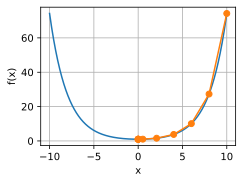

In [92]:
c = torch.tensor(0.5)

def f(x):  # objective function
    return torch.cosh(c * x)

def f_grad(x):  # Gradient of the objective function
    return c * torch.sinh(c * x)

def f_hess(x):  # Hessian of the objective function
    return c ** 2 * torch.cosh(c * x)

def newton(x,step,eta=1):
    results = [x]
    for i in range(step):
        x -= eta * f_grad(x) / f_hess(x)
        results.append(float(x))
    print('epoch 10, x:', x)
    return results

show_trace(newton(10.0,10), f)

Xét hàm $f(x)=x \cos(cx)$ với một hằng số $c$. Trong phương pháp Newton, ta chia cho Hessian. Điều này có nghĩa là nếu đạo hàm bậc hai âm, ta có thể đi theo hướng làm tăng giá trị của $f$.

epoch 10, x: tensor(26.8341)


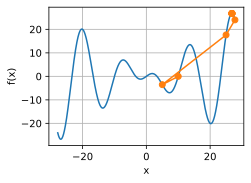

In [93]:
c = torch.tensor(0.15 * np.pi)

def f(x):  # Objective function
    return x * torch.cos(c * x)

def f_grad(x):  # Gradient of the objective function
    return torch.cos(c * x) - c * x * torch.sin(c * x)

def f_hess(x):  # Hessian of the objective function
    return -2 * c * torch.sin(c * x) - c ** 2 * x * torch.cos(c * x)

show_trace(newton(10,10), f)

Hàm số không di chuyển về cực tiểu do đạo hàm bậc 2 âm. Một phương pháp là lấy Hessian bằng cách lấy giá trị tuyệt đối của nó. Một chiến lược khác là đưa lại tốc độ học. Có thông tin bậc hai cho phép thận trọng bất cứ khi nào độ cong lớn và thực hiện các bước dài hơn bất cứ khi nào hàm mục tiêu phẳng hơn. Với tốc độ học nhỏ hơn một chút, chẳng hạn $\eta=0.5$, thuật toán hoạt động hiệu quả hơn.

epoch 10, x: tensor(7.2699)


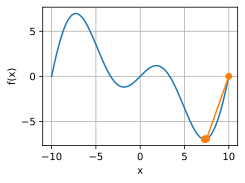

In [94]:
show_trace(newton(10,10,0.5), f)

### Ví dụ minh họa
Lấy thêm một ví dụ minh họa với $f(x) = x \log(x)$. Với phương pháp gradient descent thông thường và phương pháp Newton ta có thể thấy phương pháp Newton tiến về điểm tối ưu nhanh hơn với cùng tốc độ học $\eta=0.2$ và cùng số bước là 10.

epoch 10, x: tensor(3.6516)


/tmp/ipykernel_6133/4250975044.py:2: RuntimeWarning: invalid value encountered in log
  return x * np.log(x)


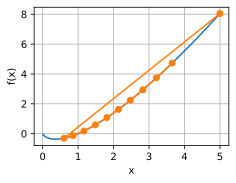

In [95]:
def f(x):
    return x * np.log(x)

def f_grad(x):
    x=torch.tensor([x])
    return (torch.log(x) + 1).item()

def f_grad2(x):
    return 1 / x
show_trace(newton(5,10,0.2), f)


epoch 11, x: 1.014694


/tmp/ipykernel_6133/4250975044.py:2: RuntimeWarning: invalid value encountered in log
  return x * np.log(x)


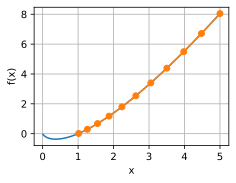

In [96]:
def gd(eta, f_grad, start_x, step):
    x = start_x
    results = [x]
    for i in range(step):
        x -= eta * f_grad(x)
        results.append(x)
    print(f'epoch 11, x: {x:.6f}')
    return results

results = gd(0.2, f_grad,5,10)
show_trace(results, f)

### Phân Tích Hội Tụ
Ta chỉ phân tích tốc độ hội tụ của phương pháp Newton cho một hàm mục tiêu lồi và khả vi ba lần, trong đó đạo hàm bậc hai khác không, tức là $f^{\prime\prime}>0$.
Gọi $x^{(k)}$ là giá trị của $x$ tại lần lặp thứ $k$ và đặt $e^{(k)} \stackrel{\text{def}}{=} x^{(k)}-x^*$ là khoảng cách từ điểm tối ưu tại lần lặp thứ $k$. Bằng khai triển Taylor, ta có điều kiện $f^{\prime}\left(x^{(*)}\right)=0$ có thể được viết là:
$$0=f^{\prime}\left(x^{(k)}-e^{(k)}\right)=f^{\prime}\left(x^{(k)}\right)-e^{(k)} f^{\prime\prime}\left(x^{(k)}\right)+\frac{1}{2}\left(e^{(k)}\right)^2 f^{\prime\prime\prime}\left(\xi^{(k)}\right),\tag{9}$$
điều này đúng với một $\xi^{(k)} \in \left[x^{(k)}-e^{(k)}, x^{(k)}\right]$. Chia khai triển trên cho $f^{\prime\prime}\left(x^{(k)}\right)$, ta được:
$$e^{(k)}-\frac{f^{\prime}\left(x^{(k)}\right)}{f^{\prime\prime}\left(x^{(k)}\right)}=\frac{1}{2}\left(e^{(k)}\right)^2 \frac{f^{\prime\prime\prime}\left(\xi^{(k)}\right)}{f^{\prime\prime}\left(x^{(k)}\right)} .\tag{10}$$
Nhớ rằng ta có cập nhật $x^{(k+1)}=x^{(k)}-f^{\prime}\left(x^{(k)}\right) / f^{\prime\prime}\left(x^{(k)}\right)$ (phương pháp Newton). Thay vào phương trình cập nhật này và lấy giá trị tuyệt đối của cả hai vế, ta có:
$$
e^{(k+1)}=x^{(k+1)} - x^*
         =x^{(k)}-f^{\prime}\left(x^{(k)}\right) / f^{\prime\prime}\left(x^{(k)}\right)- x^* = e^{(k)}-f^{\prime}\left(x^{(k)}\right) / f^{\prime\prime}\left(x^{(k)}\right)= \frac{1}{2}\left(e^{(k)}\right)^2 \frac{f^{\prime\prime\prime}\left(\xi^{(k)}\right)}{f^{\prime\prime}\left(x^{(k)}\right)}
$$
Lấy trị tuyệt đối 2 vế:
$$\left|e^{(k+1)}\right|=\frac{1}{2}\left(e^{(k)}\right)^2 \frac{\left|f^{\prime\prime\prime}\left(\xi^{(k)}\right)\right|}{f^{\prime\prime}\left(x^{(k)}\right)} .\tag{11}$$
Do đó, bất cứ khi nào ta ở trong một vùng có $\left|f^{\prime\prime\prime}\left(\xi^{(k)}\right)\right| /\left(2 f^{\prime\prime}\left(x^{(k)}\right)\right) \leq c$, ta có sai số giảm bậc hai:
$$\left|e^{(k+1)}\right| \leq c\left(e^{(k)}\right)^2 .\tag{12}$$
Lưu ý rằng các nhà nghiên cứu tối ưu hóa gọi đây là hội tụ tuyến tính, trong khi một điều kiện như $\left|e^{(k+1)}\right| \leq \alpha\left|e^{(k)}\right|$ được gọi là tốc độ hội tụ hằng số. Phân tích này đi kèm với một số lưu ý. Thứ nhất, không thực sự có đảm bảo khi nào sẽ đạt được vùng hội tụ nhanh. Thay vào đó chỉ biết rằng một khi đạt được, hội tụ sẽ rất nhanh. Thứ hai, phân tích này yêu cầu $f$ có tính chất tốt đến các đạo hàm bậc cao. Nó phụ thuộc vào việc đảm bảo rằng $f$ không có bất kỳ đặc tính "bất ngờ" nào về cách nó có thể thay đổi giá trị.

### Tiền Điều Kiện Hóa
Không ngạc nhiên khi việc tính toán và lưu trữ toàn bộ Hessian rất tốn kém. Một cách để cải thiện là tiền điều kiện hóa. Nó tránh tính toán toàn bộ Hessian mà chỉ tính các phần tử đường chéo. Điều này dẫn đến các thuật toán cập nhật dạng:
$$\mathbf{x} \leftarrow \mathbf{x}-\eta \operatorname{diag}(\mathbf{H})^{-1} \nabla f(\mathbf{x}) .$$
Mặc dù điều này không tốt bằng phương pháp Newton đầy đủ, nó vẫn tốt hơn nhiều so với việc không sử dụng. Để thấy tại sao đây là ý tưởng tốt, hãy xem xét một tình huống mà một biến biểu thị chiều cao tính bằng milimet và một biến khác biểu thị chiều cao tính bằng kilômét. Giả sử rằng với cả hai, tỷ lệ tự nhiên là mét, ta có sự không khớp lớn trong tham số hóa. May mắn thay, việc sử dụng tiền điều kiện hóa sẽ loại bỏ điều này. Hiệu quả, tiền điều kiện hóa với gradient descent tương đương với việc chọn một tốc độ học khác nhau cho mỗi biến (tọa độ của vector $\mathbf{x}$). Như ta sẽ thấy sau, tiền điều kiện hóa thúc đẩy một số cải tiến trong các thuật toán tối ưu hóa gradient descent ngẫu nhiên.
### Gradient descent với Tìm Kiếm Tuyến
Một trong những vấn đề chính trong hạ gradient là ta có thể vượt quá mục tiêu hoặc tiến bộ không đủ. Một cách sửa đơn giản là sử dụng tìm kiếm tuyến kết hợp với gradient descent. Tức là, ta sử dụng hướng được cho bởi $\nabla f(\mathbf{x})$ và sau đó thực hiện tìm kiếm nhị phân để xác định tốc độ học $\eta$ nào tối ưu hóa $f(\mathbf{x}-\eta \nabla f(\mathbf{x}))$.
Thuật toán này hội tụ nhanh chóng. Tuy nhiên, đối với mục đích học sâu, điều này không thực sự khả thi, vì mỗi bước của tìm kiếm tuyến sẽ yêu cầu đánh giá hàm mục tiêu trên toàn bộ tập dữ liệu. Điều này quá tốn kém để thực hiện.

## Excercises
### 1. Thử nghiệm với các tốc độ học và hàm mục tiêu khác nhau để giảm dần độ dốc.
Đã thực hiện trong quá trình tìm hiểu
### 2. Triển khai tìm kiếm tuyến để giảm thiểu một hàm lồi trong khoảng [𝑎, 𝑏].
#### 1. Bạn có cần đạo hàm cho tìm kiếm nhị phân không, tức là để quyết định chọn $[𝑎, (𝑎 +
𝑏)/2]$ hay $[(𝑎 + 𝑏)/2, 𝑏]$.
Không thực sự cần đạo hàm cho tìm kiếm nhị phân, nhưng tìm kiếm nhị phân đơn giản trên x sẽ không hoạt động trực tiếp nếu không có thêm thông tin.
- Nếu hàm đơn điệu trên khoảng $[a,b]$ thì thực hiện tìm kiếm nhị phân cho $f(x)=0$ sẽ có hiệu quả và không cần sử dụng tới đạo hàm
- Nếu hàm không đơn điệu trong khoảng $[a,b]$, để tối thiểu hóa $f(x)$. Nếu chỉ đánh giá $f((a+b)/2)$ thì sẽ không xác định được điểm cực tiểu nằm ở trong khoảng $[(a+b)/2,b]$ hay $[a,(a+b)/2]$. Giả sử $f((a+b)/2)<f(a)$ ta sẽ không biết được điểm cực tiểu nằm trong khoảng $[(a+b)/2,b]$ hay $[a,(a+b)/2]$ 
##### Phương pháp không sử dụng đạo hàm để quyết định chọn khoảng trong trường hợp hàm lồi.
-Chọn 2 điểm $x_1$, $x_2$:
  - Nếu $f(x_1)<f(x_2)$ điểm cực tiểu sẽ nằm trong khoảng $[a,x_2]$
  - Nếu $f(x_1)>f(x_2)$ điểm cực tiểu sẽ nằm trong khoảng $[x_1,b]$
##### Phương pháp sử dụng đạo hàm để quyết định chọn khoảng trong trường hợp hàm lồi.
- Đánh giá đạo hàm $f^{\prime}((a+b)/2)$
  - Nếu $f^{\prime}((a+b)/2)<0$ hàm số đang giảm tại điểm $(a+b)/2$ nên cực tiểu nằm trong khoảng $[(a+b)/2, b]$
  - Nếu $f^{\prime}((a+b)/2)>0$ hàm số đang tăng tại điểm $(a+b)/2$ nên cực tiểu nằm trong khoảng $[a,(a+b)/2]$
#### 2. Tốc độ hội tụ của thuật toán nhanh như thế nào?
- Tốc độ hội tụ là **tuyến tính**. Độ rộng của khoảng được giảm theo một hệ số không đổi sau mỗi bước lặp, hệ số này là $ \frac{1}{\varphi} \approx 0{,}618$ (với $\varphi$, xấp xỉ $1{,}618 $.Điều này có nghĩa là, để đạt được **một chữ số thập phân chính xác hơn** (tức là giảm độ rộng khoảng tìm kiếm đi 10 lần), ta cần khoảng:$\frac{\log(10)}{\log(\varphi)} \approx 4{,}78$ bước lặp.
- Nếu đạo hàm của hàm $f(x)$ có sẵn, ta có thể thực hiện **tìm kiếm nhị phân trên $f'(x)$**. Phương pháp này cũng có **tốc độ hội tụ tuyến tính**, nhưng hệ số giảm độ rộng khoảng tại mỗi bước là $0{,}5$ (tức là chia đôi khoảng). Điều này nhanh hơn so với phương pháp **Tìm kiếm theo Tỷ lệ Vàng** (Golden Section Search).Để đạt được **một chữ số thập phân chính xác hơn** (tức là giảm độ rộng khoảng đi 10 lần), cần khoảng:$\frac{\log(10)}{\log(2)} \approx 3{,}32$ bước lặp.
#### 3. Triển khai thuật toán và áp dụng nó để tối thiểu log(exp(𝑥) + exp(−2𝑥 − 3)).

Approximate minimum at x = -0.768951
Function value f(x) = -0.363486
Number of iterations: 15


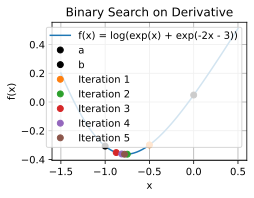

In [97]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    """Function to minimize: f(x) = log(exp(x) + exp(-2x - 3))"""
    return np.log(np.exp(x) + np.exp(-2 * x - 3))

def f_prime(x):
    """Derivative of f(x)"""
    return (np.exp(x) - 2 * np.exp(-2 * x - 3)) / (np.exp(x) + np.exp(-2 * x - 3))

def binary_search_derivative(f_prime, a, b, tol=1e-5):
    """
    Find the root of f'(x) = 0 in [a, b] using binary search, assuming f'(a) and f'(b) have opposite signs.
    Returns the approximate minimum point x, number of iterations, and list of midpoints.
    """
    if f_prime(a) * f_prime(b) >= 0:
        raise ValueError("f'(a) and f'(b) must have opposite signs")
    
    iterations = 0
    midpoints = []
    
    while (b - a) > tol:
        m = (a + b) / 2
        fm = f_prime(m)
        midpoints.append(m)
        iterations += 1
        
        if abs(fm) < tol:  # If derivative is close to zero, stop
            break
        elif fm > 0:
            b = m  # Root is in [a, m]
        else:
            a = m  # Root is in [m, b]
    
    x_min = (a + b) / 2
    return x_min, iterations, midpoints

# Run Binary Search
a, b = -1, 0
tol = 1e-5
x_min, iterations, midpoints = binary_search_derivative(f_prime, a, b, tol)

# Print results
print(f"Approximate minimum at x = {x_min:.6f}")
print(f"Function value f(x) = {f(x_min):.6f}")
print(f"Number of iterations: {iterations}")

# Plot the function and search progress
x = np.linspace(-1.5, 0.5, 1000)
y = f(x)
plt.plot(x, y, '-', label='f(x) = log(exp(x) + exp(-2x - 3))')

# Plot the midpoints from the first few iterations
plt.plot(-1, f(-1), 'o', color='black', label='a')
plt.plot(0, f(0), 'o', color='black', label='b')
for i, m in enumerate(midpoints[:5]):  # Show first 5 iterations
    plt.plot(m, f(m), 'o', label=f'Iteration {i+1}' if i < 5 else '')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Binary Search on Derivative')
plt.legend()
plt.grid(True)
plt.show()

### 3. Thiết kế một hàm mục tiêu xác định trên $\mathbb{R}^2$ mà gradient descent rất chậm.
#### Hàm $f(x_1, x_2)= x_1^2 + Sx_2^2$
Tại sao hàm $f(x_1, x_2)= x_1^2 + Sx_2^2$ lại hội tụ chậm:
- Cực tiểu toàn cục của hàm này rõ ràng nằm tại $(x_1, x_2) = (0, 0)$, với $f(0, 0) = 0$.
- $\nabla f(x_1, x_2) = [2x_1,\ 2Sx_2]$
- $H = \begin{bmatrix}
\frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1 \partial x_2} \\
\frac{\partial^2 f}{\partial x_2 \partial x_1} & \frac{\partial^2 f}{\partial x_2^2}
\end{bmatrix}
= 
\begin{bmatrix}
2 & 0 \\
0 & 2S
\end{bmatrix}$

### Số điều kiện (Condition Number):

Các giá trị riêng của ma trận Hessian là:

- $\lambda_1 = 2$
- $\lambda_2 = 2S$

Vậy số điều kiện của Hessian là:
$$
\kappa(H) = \frac{\lambda_{\text{max}}}{\lambda_{\text{min}}} = \frac{2S}{2} = S
$$
Nếu $S$ lớn (ví dụ $S = 100$), số điều kiện là 100. Khi $S$ lớn, các ellipse sẽ bị kéo dãn mạnh. Nếu $S > 1$, chúng bị kéo dãn theo trục $x_1$ (nghĩa là "thung lũng" sẽ hẹp theo phương $x_2$ và dài theo phương $x_1$). Hàm tăng rất nhanh theo hướng $x_2$ so với hướng $x_1$.

### Hành vi của Gradient Descent:

Gradient $\nabla f = [2x_1,\ 2Sx_2]$ sẽ có thành phần lớn hơn nhiều ở hướng $x_2$ (do hệ số $2S$) khi $x_2 \ne 0$.

Khi Gradient Descent cập nhật:

$$
x_{\text{new}} = x_{\text{old}} - \alpha \nabla f
$$

thì thay đổi của $x_2$ sẽ lớn hơn đáng kể so với $x_1$.

Điều này khiến thuật toán dao động (zig-zag) qua lại nhanh trong phần hẹp của thung lũng (hướng $x_2$), trong khi tiến triển dọc theo phần bằng phẳng (hướng $x_1$) rất chậm.

Để tránh sai lệch do thành phần gradient $x_2$ quá lớn, tốc độ học $\alpha$ phải được giữ rất nhỏ, điều này càng làm chậm bước đi theo hướng $x_1$.


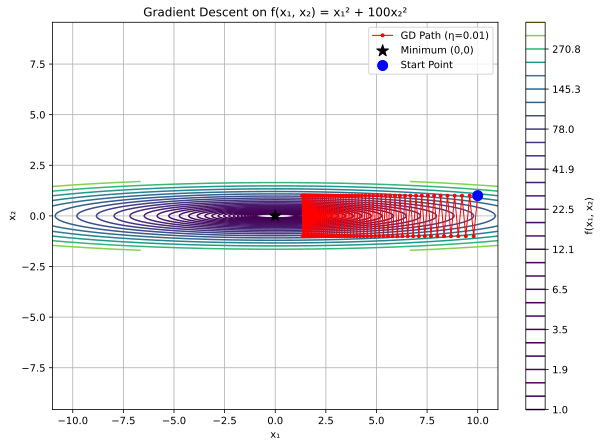

In [98]:
import numpy as np
import matplotlib.pyplot as plt

S = 100  # Scaling factor

def f(x1, x2):
  return x1**2 + S * x2**2

def grad_f(x1, x2):
  return np.array([2 * x1, 2 * S * x2])

# --- Gradient Descent Implementation ---
def gradient_descent(grad_f, start_point, learning_rate, iterations):
    x = np.array(start_point, dtype=float)
    path = [x.copy()] # Store the path
    for i in range(iterations):
        grad = grad_f(x[0], x[1])
        x = x - learning_rate * grad
        path.append(x.copy())
        # Optional: Check for divergence or convergence
        if np.linalg.norm(grad) < 1e-6:
            print(f"Converged at iteration {i+1}")
            break
        if np.any(np.abs(x) > 1e5): # Crude divergence check
            print(f"Diverged at iteration {i+1}")
            break
    return np.array(path)

# --- Parameters ---
start_x = np.array([10.0, 1.0])   
learning_rate_eta = 0.01
num_iterations = 100

# --- Run Gradient Descent ---
path = gradient_descent(
    grad_f,
    start_x,
    learning_rate_eta,
    num_iterations
)
def draw_function(path):
    
    x1_vals = np.linspace(min(path[:, 0].min(), -10) - 1, max(path[:, 0].max(), 10) + 1, 200)
    x2_vals = np.linspace(min(path[:, 1].min(), -1.5) - 0.2, max(path[:, 1].max(), 1.5) + 0.2, 200)
    X1, X2 = np.meshgrid(x1_vals, x2_vals)
    Z = f(X1, X2)
    
    plt.figure(figsize=(10, 7))
    
    levels = np.logspace(0, np.log10(Z.max() if Z.max() > 0 else 1), 30) if Z.max() > 0 else 10
    contour = plt.contour(X1, X2, Z, levels=levels, cmap='viridis')
    plt.colorbar(contour, label='f(x₁, x₂)')
    
    # Plot the path of gradient descent
    plt.plot(path[:, 0], path[:, 1], 'r-o', markersize=3, linewidth=1, label=f'GD Path (η={learning_rate_eta})')
    
    plt.scatter(0, 0, color='black', marker='*', s=150, label='Minimum (0,0)', zorder=5)
    plt.scatter(start_x[0], start_x[1], color='blue', s=100, label='Start Point', zorder=4)
    
    plt.title(f'Gradient Descent on f(x₁, x₂) = x₁² + {S}x₂²')
    plt.xlabel('x₁')
    plt.ylabel('x₂')
    plt.legend()
    plt.axis('equal') 
    plt.grid(True)
    plt.show()
draw_function(path)

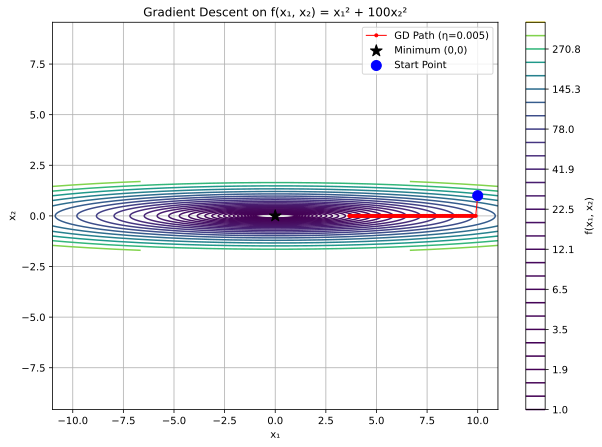

In [99]:
# --- Parameters ---
start_x = np.array([10.0, 1.0])   
learning_rate_eta = 0.005
num_iterations = 100

# --- Run Gradient Descent ---
path = gradient_descent(
    grad_f,
    start_x,
    learning_rate_eta,
    num_iterations
)
draw_function(path)

### 4. Triển khai phiên bản của phương pháp Newton bằng cách sử dụng tiền điều kiện hóa.
Tiền điều kiện chéo (Diagonal Preconditioner) $M$:

Ta lấy các phần tử trên đường chéo chính của Hessian: $\text{diag}(H) = [2,\ 2S]$.

Dùng giá trị tuyệt đối (mặc dù trong trường hợp này với $S > 0$, chúng đã là số dương): 

$$
M_{\text{diag}} = [|2|,\ |2S|] = [2,\ 2S]
$$

Ma trận tiền điều kiện $M$ (nếu viết đầy đủ, dù ta chỉ cần phần tử đường chéo để tính $M^{-1} \nabla f$):

$$
M = \begin{bmatrix}
2 & 0 \\
0 & 2S
\end{bmatrix}
$$

---

### Nghịch đảo của tiền điều kiện chéo $M^{-1}$ (áp dụng từng phần tử):

Nếu $M$ là ma trận chéo với phần tử $m_{ii}$, thì $M^{-1}$ cũng là chéo với phần tử $1/m_{ii}$.

Vì vậy, tiền điều kiện có tác dụng **chia từng thành phần của gradient cho phần tử tương ứng trên đường chéo của Hessian**.

---

### Quy tắc cập nhật:

Gradient descent có tiền điều kiện chuẩn là:

$$
x_{\text{new}} = x_{\text{old}} - \eta \cdot M^{-1} \nabla f
$$

Với $M$ là ma trận chéo, ta có:

- $x_1^{\text{new}} = x_1^{\text{old}} - \eta \cdot \left( \frac{\partial f / \partial x_1}{|H_{11}|} \right)$  
- $x_2^{\text{new}} = x_2^{\text{old}} - \eta \cdot \left( \frac{\partial f / \partial x_2}{|H_{22}|} \right)$

---

### Thay các giá trị cụ thể vào:

- $x_1^{\text{new}} = x_1^{\text{old}} - \eta \cdot \left( \frac{2x_1^{\text{old}}}{|2|} \right) = x_1^{\text{old}} - \eta \cdot x_1^{\text{old}} = x_1^{\text{old}} (1 - \eta)$

- $x_2^{\text{new}} = x_2^{\text{old}} - \eta \cdot \left( \frac{2Sx_2^{\text{old}}}{|2S|} \right) = x_2^{\text{old}} - \eta \cdot x_2^{\text{old}} = x_2^{\text{old}} (1 - \eta)$

Converged at iteration 32


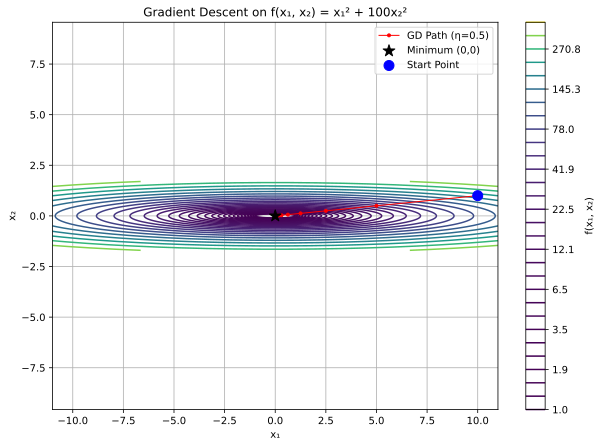

In [100]:


def diag_hessian_abs_f(x1, x2):

  h11 = 2.0
  h22 = 2.0 * S
  epsilon = 1e-8
  return np.array([abs(h11) + epsilon, abs(h22) + epsilon])

def preconditioned_gradient_descent(
    grad_f, diag_hess_abs_f, start_point, learning_rate_eta, iterations
):
    x = np.array(start_point, dtype=float)
    path = [x.copy()] # Store the path

    for i in range(iterations):
        grad = grad_f(x[0], x[1])
        diag_H_abs = diag_hess_abs_f(x[0], x[1])

        # Element-wise division for preconditioning
        preconditioned_grad = grad / diag_H_abs

        x = x - learning_rate_eta * preconditioned_grad
        path.append(x.copy())

        # Check for convergence or divergence
        if np.linalg.norm(grad) < 1e-7: # Check original gradient for convergence
            print(f"Converged at iteration {i+1}")
            break
        if np.any(np.abs(x) > 1e6): # Crude divergence check
            print(f"Diverged at iteration {i+1}")
            break
    return np.array(path)

# --- Parameters ---
start_x = np.array([10.0, 1.0])   # Start pointt
learning_rate_eta = 0.5 
num_iterations = 50


path_preconditioned = preconditioned_gradient_descent(
    grad_f,
    diag_hessian_abs_f,
    start_x,
    learning_rate_eta,
    num_iterations
)
draw_function(path_preconditioned)

Với tốc độ học $\eta=0.5$ ta thấy sau lần lặp đầu tiên giá trị của $x_1, x_2$ đã giảm 1 nửa do 
- $x_1^{\text{new}} = x_1^{\text{old}} (1 - \eta)=x_1^{\text{old}} (1 - 0.5)$ 
- $x_2^{\text{new}} = x_2^{\text{old}} (1 - \eta)=x_2^{\text{old}} (1 - 0.5)$


### Áp dụng thuật toán trên cho một số hàm mục tiêu (lồi hoặc không). Điều gì xảy ra nếu bạn xoay tọa độ 45 độ?
#### 1. Elliptic Paraboloid:

$$
f(x_1, x_2) = x_1^2 + 100x_2^2
$$

- $\text{diag}_H^{\text{abs}} = [2,\ 200]$ (hằng số)
- **Kỳ vọng**: Hội tụ nhanh và trực tiếp (1 bước nếu $\eta = 1$)
#### 2. Circular Paraboloid:

$$
f(x_1, x_2) = x_1^2 + x_2^2
$$

- $\text{diag}_H^{\text{abs}} = [2,\ 2]$ (hằng số)
- **Kỳ vọng**: Hội tụ nhanh và trực tiếp (1 bước nếu $\eta = 1$).  
#### 3. Hàm Rosenbrock (Không lồi):

$$
f(x_1, x_2) = (1 - x_1)^2 + 100(x_2 - x_1^2)^2
$$

- $\frac{\partial^2 f}{\partial x_1^2} = 2 - 400(x_2 - x_1^2) + 1200x_1^2$
- $\frac{\partial^2 f}{\partial x_2^2} = 200$

- $\text{diag}_H^{\text{abs}} = [|2 - 400(x_2 - x_1^2) + 1200x_1^2|,\ 200]$  *($H_{11}$ có thể âm!)*

- **Kỳ vọng**: Thành phần $H_{11}$ rất phức tạp và phụ thuộc vào $x_1, x_2$.  

#### 4. Hàm không lồi đơn giản (Hai điểm cực tiểu):

$$
f(x_1, x_2) = x_1^4 - 2x_1^2 + x_2^2
$$

- Cực tiểu tại $(\pm1,\ 0)$, điểm yên tại $(0,\ 0)$
- $\frac{\partial^2 f}{\partial x_1^2} = 12x_1^2 - 4$
- $\frac{\partial^2 f}{\partial x_2^2} = 2$
- $\text{diag}_H^{\text{abs}} = [|12x_1^2 - 4|,\ 2]$  *( $H_{11}$ có thể âm hoặc bằng 0)*
- **Kỳ vọng**: Thuật toán sẽ hội tụ đến một cực tiểu tùy theo điểm khởi đầu.  

--- 1. Ill-Conditioned Elliptical Paraboloid ---
Ill-Conditioned Convex - Starting at: [10.  1.]
Ill-Conditioned Convex - Ending at after 2 iterations: [0. 0.]


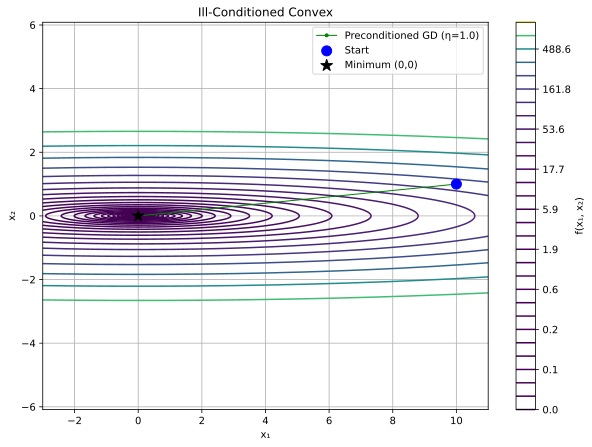


--- 2. Well-Conditioned Circular Paraboloid ---
Well-Conditioned Convex - Starting at: [10.  1.]
Well-Conditioned Convex - Ending at after 2 iterations: [0. 0.]


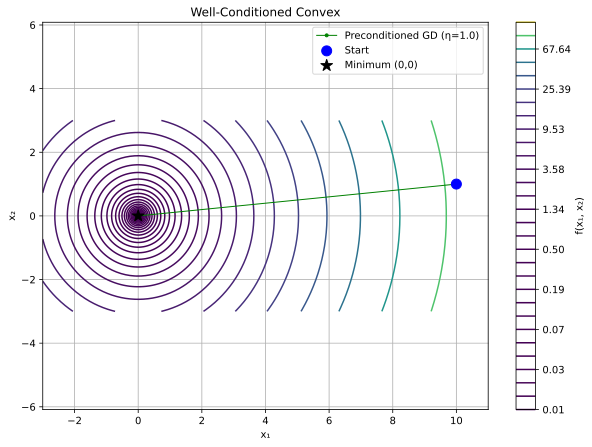


--- 3. Rosenbrock Function ---
Rosenbrock (Non-Convex) - Starting at: [-1.5  1.5]
Rosenbrock (Non-Convex) - Ending at after 500 iterations: [-1.33686672  1.79070709]


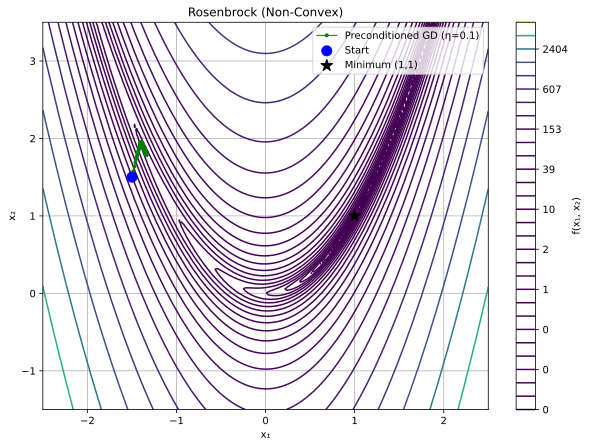


--- 4. Two Minima Function ---
Two Minima (Start near saddle) - Starting at: [0.5 0.5]
Two Minima (Start near saddle) - Ending at after 28 iterations: [1.00000000e+00 1.86264515e-09]


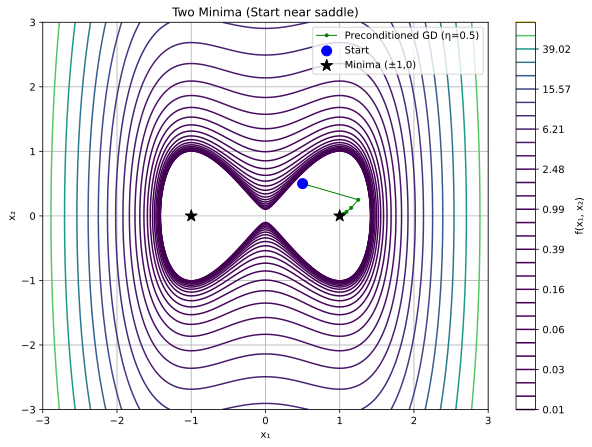

Two Minima (Start near x1=1 min) - Starting at: [2.  0.5]
Two Minima (Start near x1=1 min) - Ending at after 30 iterations: [1.00000001e+00 4.65661287e-10]


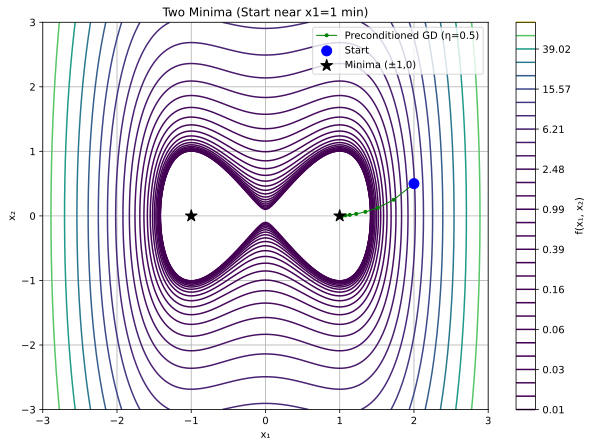

Two Minima (Start near x1=-1 min) - Starting at: [-2.  -0.5]
Two Minima (Start near x1=-1 min) - Ending at after 30 iterations: [-1.00000001e+00 -4.65661287e-10]


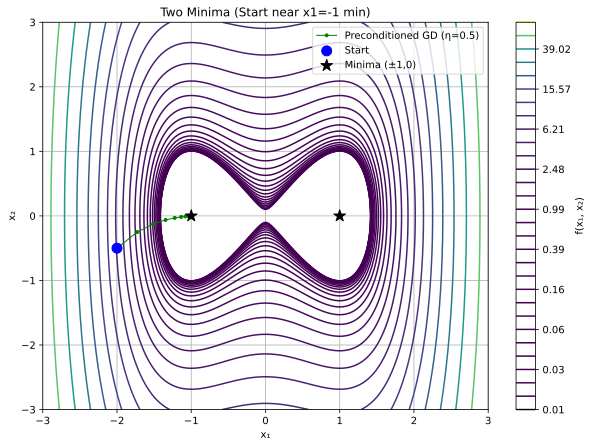


--- 5. Rotated Ill-Conditioned Function (45 degrees) ---
Rotated Ill-Conditioned (Preconditioned GD) - Starting at: [ 7. -7.]
Rotated Ill-Conditioned (Preconditioned GD) - Ending at after 300 iterations: [ 6.7951268 -6.7951268]


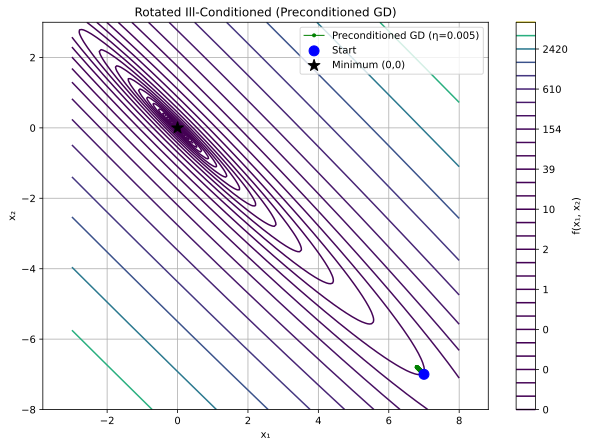


Comparing with Standard GD on Rotated function:


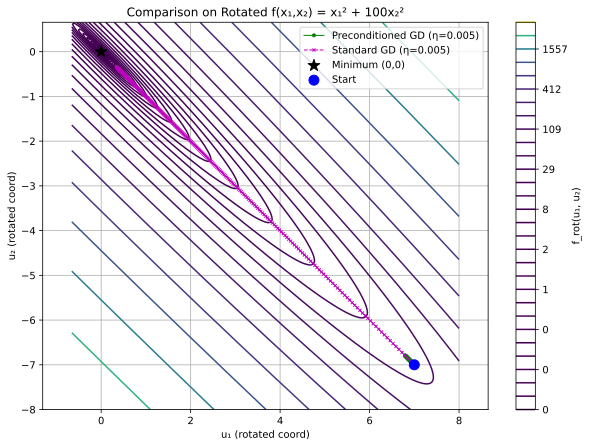

In [105]:
import numpy as np
import matplotlib.pyplot as plt

# --- Helper: Generic Optimization and Plotting ---
def run_optimizer(
    optimizer_func,
    f_obj,
    grad_f,
    diag_hess_abs_f, # Specific to preconditioned GD
    start_point,
    learning_rate_eta,
    iterations,
    title_prefix="",
    S_param=None # For functions that use S
):
    if S_param is not None: # If the function needs S, curry it
        obj_func_to_plot = lambda x1, x2: f_obj(x1, x2, S_param)
    else:
        obj_func_to_plot = f_obj

    path = optimizer_func(
        grad_f,
        diag_hess_abs_f, # Pass this
        start_point,
        learning_rate_eta,
        iterations,
        S_param # Pass S if needed for grad/hessian
    )

    print(f"{title_prefix} - Starting at: {path[0]}")
    print(f"{title_prefix} - Ending at after {len(path)-1} iterations: {path[-1]}")

    # Visualization
    # Adjust plot ranges based on path and known features of the function
    x_min_plot = min(path[:, 0].min() - 1, -2.5 if "Rosenbrock" in title_prefix else -3)
    x_max_plot = max(path[:, 0].max() + 1, 2.5 if "Rosenbrock" in title_prefix else 3)
    y_min_plot = min(path[:, 1].min() - 1, -1.5 if "Rosenbrock" in title_prefix else -3)
    y_max_plot = max(path[:, 1].max() + 1, 3.5 if "Rosenbrock" in title_prefix else 3)

    x1_vals = np.linspace(x_min_plot, x_max_plot, 200)
    x2_vals = np.linspace(y_min_plot, y_max_plot, 200)
    X1, X2 = np.meshgrid(x1_vals, x2_vals)
    Z = obj_func_to_plot(X1, X2)

    plt.figure(figsize=(10, 7))
    levels = np.logspace(np.log10(max(Z.min(), 0.01)), np.log10(Z.max() if Z.max() > 0 else 1), 30) if Z.min() < Z.max() else 15
    try:
        contour = plt.contour(X1, X2, Z, levels=levels, cmap='viridis')
        plt.colorbar(contour, label='f(x₁, x₂)')
    except Exception as e:
        print(f"Contour plot error for {title_prefix}: {e}")
        plt.contour(X1, X2, Z, cmap='viridis') # Fallback


    plt.plot(path[:, 0], path[:, 1], 'g-o', markersize=3, linewidth=1, label=f'Preconditioned GD (η={learning_rate_eta})')
    plt.scatter(path[0, 0], path[0, 1], color='blue', s=100, label='Start', zorder=4)
    # Add known minima if applicable
    if "Ill-Conditioned" in title_prefix or "Well-Conditioned" in title_prefix:
        plt.scatter(0, 0, color='black', marker='*', s=150, label='Minimum (0,0)', zorder=5)
    elif "Rosenbrock" in title_prefix:
        plt.scatter(1, 1, color='black', marker='*', s=150, label='Minimum (1,1)', zorder=5)
    elif "Two Minima" in title_prefix:
        plt.scatter([1, -1], [0, 0], color='black', marker='*', s=150, label='Minima (±1,0)', zorder=5)


    plt.title(title_prefix)
    plt.xlabel('x₁')
    plt.ylabel('x₂')
    plt.legend()
    plt.axis('equal' if "Ill-Conditioned" in title_prefix or "Well-Conditioned" in title_prefix else 'tight')
    plt.grid(True)
    plt.show()
    return path 
    

# --- Diagonal Preconditioned Gradient Descent (from previous example) ---
def preconditioned_gradient_descent(
    grad_f, diag_hess_abs_f, start_point, learning_rate_eta, iterations, S_param=None
):
    x = np.array(start_point, dtype=float)
    path = [x.copy()]
    epsilon_hess = 1e-8 # For numerical stability if diag_H is zero

    for i in range(iterations):
        # Pass S if the gradient/Hessian functions need it
        current_grad = grad_f(x[0], x[1], S_param) if S_param is not None else grad_f(x[0], x[1])
        current_diag_H_abs = diag_hess_abs_f(x[0], x[1], S_param) if S_param is not None else diag_hess_abs_f(x[0], x[1])

        # Ensure diagonal elements are not zero (add epsilon)
        preconditioner = np.maximum(current_diag_H_abs, epsilon_hess)
        preconditioned_grad = current_grad / preconditioner

        x = x - learning_rate_eta * preconditioned_grad
        path.append(x.copy())

        if np.linalg.norm(current_grad) < 1e-7:
            # print(f"Converged at iteration {i+1}")
            break
        if np.any(np.abs(x) > 1e7): # Divergence check
            print(f"Diverged at iteration {i+1}")
            break
    return np.array(path)

# --- Function Definitions ---

# 1. Ill-Conditioned Convex (Elliptical Paraboloid)
S_ill = 100
def f_ill(x1, x2, S=S_ill): return x1**2 + S * x2**2
def grad_f_ill(x1, x2, S=S_ill): return np.array([2 * x1, 2 * S * x2])
def diag_hess_abs_f_ill(x1, x2, S=S_ill): return np.array([abs(2.0), abs(2.0 * S)])

# 2. Well-Conditioned Convex (Circular Paraboloid)
def f_well(x1, x2): return x1**2 + x2**2
def grad_f_well(x1, x2): return np.array([2 * x1, 2 * x2])
def diag_hess_abs_f_well(x1, x2): return np.array([abs(2.0), abs(2.0)])

# 3. Rosenbrock Function (Non-Convex)
def f_rosen(x1, x2): return (1 - x1)**2 + 100 * (x2 - x1**2)**2
def grad_f_rosen(x1, x2):
    g1 = -2 * (1 - x1) - 400 * x1 * (x2 - x1**2)
    g2 = 200 * (x2 - x1**2)
    return np.array([g1, g2])
def diag_hess_abs_f_rosen(x1, x2):
    h11 = 2 - 400 * (x2 - x1**2) + 1200 * x1**2 # Corrected from 800 to 1200
    h22 = 200.0
    return np.array([abs(h11), abs(h22)])

# 4. Simple Non-Convex (Two Minima)
def f_two_min(x1, x2): return x1**4 - 2*x1**2 + x2**2
def grad_f_two_min(x1, x2): return np.array([4*x1**3 - 4*x1, 2*x2])
def diag_hess_abs_f_two_min(x1, x2):
    h11 = 12*x1**2 - 4
    h22 = 2.0
    return np.array([abs(h11), abs(h22)])


# --- Run Experiments ---
eta = 0.5 # A reasonably robust learning rate for this preconditioned method
# For quadratics, eta=1 is often optimal, but 0.5 is safer for non-quadratics
iters = 200

print("--- 1. Ill-Conditioned Elliptical Paraboloid ---")
run_optimizer(preconditioned_gradient_descent, f_ill, grad_f_ill, diag_hess_abs_f_ill,
              [10.0, 1.0], 1.0, 50, "Ill-Conditioned Convex", S_param=S_ill) # eta=1 is good here

print("\n--- 2. Well-Conditioned Circular Paraboloid ---")
run_optimizer(preconditioned_gradient_descent, f_well, grad_f_well, diag_hess_abs_f_well,
              [10.0, 1.0], 1.0, 50, "Well-Conditioned Convex") # eta=1 is good here

print("\n--- 3. Rosenbrock Function ---")
# Rosenbrock needs smaller eta and more iterations
run_optimizer(preconditioned_gradient_descent, f_rosen, grad_f_rosen, diag_hess_abs_f_rosen,
              [-1.5, 1.5], 0.1, 500, "Rosenbrock (Non-Convex)") # Try smaller eta

print("\n--- 4. Two Minima Function ---")
run_optimizer(preconditioned_gradient_descent, f_two_min, grad_f_two_min, diag_hess_abs_f_two_min,
              [0.5, 0.5], eta, iters, "Two Minima (Start near saddle)")
run_optimizer(preconditioned_gradient_descent, f_two_min, grad_f_two_min, diag_hess_abs_f_two_min,
              [2.0, 0.5], eta, iters, "Two Minima (Start near x1=1 min)")
run_optimizer(preconditioned_gradient_descent, f_two_min, grad_f_two_min, diag_hess_abs_f_two_min,
              [-2.0, -0.5], eta, iters, "Two Minima (Start near x1=-1 min)")

S_rot = 100 # Use the same S as in the ill-conditioned example

# Rotated function f_rot(u1, u2)
def f_rotated(u1, u2, S=S_rot):
    return 0.5 * ((1+S)*u1**2 + (1+S)*u2**2 + 2*(S-1)*u1*u2)

def grad_f_rotated(u1, u2, S=S_rot):
    g_u1 = (1+S)*u1 + (S-1)*u2
    g_u2 = (S-1)*u1 + (1+S)*u2
    return np.array([g_u1, g_u2])

def diag_hess_abs_f_rotated(u1, u2, S=S_rot):
    # Diagonal elements of H_rot are both (1+S)
    h_diag = 1.0 + S
    return np.array([abs(h_diag), abs(h_diag)])

print("\n--- 5. Rotated Ill-Conditioned Function (45 degrees) ---")
# Start point in the rotated coordinate system
# If original start was (10,1), rotated start could be approx (10/√2 + 1/√2, -10/√2 + 1/√2)
# Or just pick a challenging start like [10.0, 1.0] in u1, u2 space
rotated_start = [7.0, -7.0] # Example start in u1, u2 space

# Let's compare with standard GD as well for this one
def standard_gradient_descent(grad_f, start_point, learning_rate_eta, iterations, S_param=None):
    x = np.array(start_point, dtype=float)
    path = [x.copy()]
    for i in range(iterations):
        current_grad = grad_f(x[0], x[1], S_param) if S_param is not None else grad_f(x[0], x[1])
        x = x - learning_rate_eta * current_grad
        path.append(x.copy())
        if np.linalg.norm(current_grad) < 1e-7: break
        if np.any(np.abs(x) > 1e7): print("Std GD Diverged"); break
    return np.array(path)

eta_rotated = 0.005 # Need a smaller eta for the rotated version (both methods)
iters_rotated = 300

path_prec_rot = run_optimizer(preconditioned_gradient_descent, f_rotated, grad_f_rotated, diag_hess_abs_f_rotated,
                  rotated_start, eta_rotated, iters_rotated, "Rotated Ill-Conditioned (Preconditioned GD)", S_param=S_rot)

print("\nComparing with Standard GD on Rotated function:")
path_std_gd_rot = standard_gradient_descent(grad_f_rotated, rotated_start, eta_rotated, iters_rotated, S_param=S_rot)

# Visualization for comparison
plt.figure(figsize=(10, 7))
x1_vals_rot = np.linspace(min(path_prec_rot[:,0].min(), path_std_gd_rot[:,0].min()) -1, max(path_prec_rot[:,0].max(), path_std_gd_rot[:,0].max()) +1, 200)
x2_vals_rot = np.linspace(min(path_prec_rot[:,1].min(), path_std_gd_rot[:,1].min()) -1, max(path_prec_rot[:,1].max(), path_std_gd_rot[:,1].max()) +1, 200)
X1_rot, X2_rot = np.meshgrid(x1_vals_rot, x2_vals_rot)
Z_rot = f_rotated(X1_rot, X2_rot, S_rot)

levels_rot = np.logspace(np.log10(max(Z_rot.min(),0.01)), np.log10(Z_rot.max() if Z_rot.max() > 0 else 1), 30) if Z_rot.min() < Z_rot.max() else 15
contour_rot = plt.contour(X1_rot, X2_rot, Z_rot, levels=levels_rot, cmap='viridis')
plt.colorbar(contour_rot, label='f_rot(u₁, u₂)')

plt.plot(path_prec_rot[:, 0], path_prec_rot[:, 1], 'g-o', markersize=3, linewidth=1, label=f'Preconditioned GD (η={eta_rotated})')
plt.plot(path_std_gd_rot[:, 0], path_std_gd_rot[:, 1], 'm--x', markersize=3, linewidth=1, label=f'Standard GD (η={eta_rotated})')

plt.scatter(0, 0, color='black', marker='*', s=150, label='Minimum (0,0)', zorder=5) # Minimum is still at origin
plt.scatter(rotated_start[0], rotated_start[1], color='blue', s=100, label='Start', zorder=4)
plt.title(f'Comparison on Rotated f(x₁,x₂) = x₁² + {S_rot}x₂²')
plt.xlabel('u₁ (rotated coord)')
plt.ylabel('u₂ (rotated coord)')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()

#### Vấn đề: Ảnh hưởng của phép quay đến cấu trúc Hessian

Khi quay một hàm như:$f(x_1, x_2) = x_1^2 + 100x_2^2$ một góc 45 độ, hàm mới (với tọa độ gọi là $u_1, u_2$) sẽ có các **thành phần ngoài đường chéo** mà giá trị của chúng lớn hơn giá trị của thành phần trên đường chéo trong ma trận Hessian.

Các **trục chính** của các đường đồng mức hình elip **sẽ không còn thẳng hàng** với các trục $u_1$ và $u_2$ nữa.

Điều này có nghĩa là hình dạng của bài toán bị "nghiêng", làm cho các phương pháp như Gradient Descent hay tiền điều kiện chéo dựa trên các phần tử đường chéo **mất hiệu quả** rõ rệt.

#### Hàm gốc (tọa độ $x_1, x_2$):

Giả sử ta có hàm $f(x_1, x_2) = x_1^2 + Sx_2^2$. Hessian $H = \begin{bmatrix} H_{11} & 0 \\ 0 & H_{22} \end{bmatrix}$

Là ma trận chéo. Bộ tiền điều kiện chéo (diagonal preconditioner) hoạt động tốt vì:$M_{\text{diag}} = [|H_{11}|, |H_{22}|]$ xác định chính xác các tỉ lệ thay đổi theo từng hướng khác nhau này và chuẩn hóa chúng.

#### Hàm sau khi quay (tọa độ $u_1, u_2$):

Phép biến đổi quay 45 độ:$x_1 = \frac{u_1 - u_2}{\sqrt{2}}, \quad x_2 = \frac{u_1 + u_2}{\sqrt{2}}$
Thay vào hàm: $f(x_1, x_2) = x_1^2 + Sx_2^2$

Ta được hàm sau khi quay:$f_{\text{rot}}(u_1, u_2) = \left( \frac{u_1 - u_2}{\sqrt{2}} \right)^2 + S \left( \frac{u_1 + u_2}{\sqrt{2}} \right)^2$. 

Rút gọn: 
$f_{\text{rot}}(u_1, u_2) = \frac{1}{2}(u_1^2 - 2u_1u_2 + u_2^2) + \frac{S}{2}(u_1^2 + 2u_1u_2 + u_2^2)
= \frac{1}{2}(1 + S)u_1^2 + \frac{1}{2}(1 + S)u_2^2 + (S - 1)u_1u_2$

---

#### Ma trận Hessian sau khi quay:

$$
H_{\text{rot}} =
\begin{bmatrix}
\frac{\partial^2 f}{\partial u_1^2} & \frac{\partial^2 f}{\partial u_1 \partial u_2} \\
\frac{\partial^2 f}{\partial u_2 \partial u_1} & \frac{\partial^2 f}{\partial u_2^2}
\end{bmatrix}
=
\begin{bmatrix}
1 + S & S - 1 \\
S - 1 & 1 + S
\end{bmatrix}
$$

---

#### Ảnh hưởng đến tiền điều kiện chéo:

Bộ tiền điều kiện chỉ dùng phần tử chéo của Hessian:

$$
\text{diag}(H_{\text{rot}}) = [|1 + S|,\ |1 + S|]
$$

Nó **bỏ qua hoàn toàn** phần tử ngoài đường chéo $(S - 1)$, đây là thành phần quan trọng khi $S$ lớn.

Ví dụ, nếu $S = 100$ thì $S - 1 = 99$ — cho thấy mối tương quan mạnh giữa $u_1$ và $u_2$ mà tiền điều kiện chéo không nắm bắt được. Điều này khiến dẫn tới:
- Hiệu suất của tiền điều kiện chéo sẽ **giảm sút đáng kể**.
- Thuật toán sẽ **dao động** trở lại như Gradient Descent thông thường.
- Tốc độ hội tụ sẽ chậm lại do vấn đề tỷ lệ co giãn không còn nằm theo trục tọa độ.